In [ ]:
!pip install transformers~=4.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.2
    Uninstalling transformers-4.40.2:
      Successfully uninstalled transformers-4.40.2


In [ ]:
pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 26.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [ ]:
import stanza
stanza.download('es')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: es (Spanish) ...


INFO:stanza:Downloaded file to /root/stanza_resources/es/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
nlp=stanza.Pipeline('es')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package         |
----------------------------------
| tokenize     | ancora          |
| mwt          | ancora          |
| pos          | ancora_charlm   |
| lemma        | ancora_nocharlm |
| constituency | combined_charlm |
| depparse     | ancora_charlm   |
| sentiment    | tass2020_charlm |
| ner          | conll02         |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
#from wordcloud import WordCloud
import re

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
from transformers import pipeline

import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('ggplot')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import warnings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AT/Tarjetas de Credito Latam.csv',on_bad_lines='skip',sep=';')
del df1['Unnamed: 0']


In [ ]:
df1['source']

0              Twitter for iPhone
1              Twitter for iPhone
2                 Twitter Web App
3              Twitter for iPhone
4             Twitter for Android
                   ...           
12699                  SocialFlow
12700         Twitter for Android
12701          Twitter for iPhone
12702    erased6644614_QyctI2jsZ5
12703         Twitter for Android
Name: source, Length: 12704, dtype: object

In [ ]:
df1.dtypes

tweet_id                   int64
text                      object
media_url                 object
video_url                 object
language                  object
favorite_count           float64
retweet_count            float64
reply_count              float64
quote_count              float64
retweet                     bool
views                    float64
timestamp                float64
video_view_count         float64
in_reply_to_status_id    float64
quoted_status_id         float64
binding_values            object
expanded_url              object
retweet_tweet_id         float64
extended_entities         object
conversation_id            int64
retweet_status           float64
quoted_status             object
bookmark_count           float64
source                    object
community_note           float64
fecha                     object
creation_date             object
user_id                  float64
username                  object
name                      object
follower_c

In [ ]:
#se identifican los lenguages de los tweets
df1['language'].unique()

array(['es', 'en', 'fi'], dtype=object)

In [ ]:
#filtramos los tweets en español para facilitar el análisis de la conversación de tarjetas de crédito en Latinoamerica
df1=df1[df1['language']=='es']

In [ ]:
#convertir a tipo datetime para posteriores análisis
df1['fecha']=pd.to_datetime(df1['fecha'])

In [ ]:
#variables relavantes para el análsis
columns=['fecha','text','location']
df1=df1[columns]

In [ ]:
df1.head()

,fecha,text,location
0,2023-12-31 17:48:26-05:00,Feliz año a todes!!! Que este 2024 nos traiga ...,Blackpink in your area!!
1,2023-12-31 16:32:36-05:00,Como ven no tengo muchos datos de ella por que...,!!(⊃ Д)⊃≡ﾟ ﾟot8
2,2023-12-31 15:15:22-05:00,Ahora podes ser Madrina o Padrino Burakero🐱\n\...,"Montevideo, Uruguay"
3,2023-12-31 13:59:15-05:00,@Patrioticos_RD El problema de Merkel es haber...,NaN
4,2023-12-31 12:05:54-05:00,"Feliz año para todos...si no hay plata, está l...",Chile


In [ ]:
#se eliminan los vacios existentes ya que no aportan al análsis completo
df1.dropna(inplace=True)

In [ ]:
df1.shape

(9150, 3)

In [ ]:
# se define esa función para limiar el texto y eliminar los emojis
def clean_text(x):
  emoji_patron = re.compile("["
                             u"\U0001F600-\U0001F64F"
                             u"\U0001F300-\U0001F5FF"
                             u"\U0001F680-\U0001F6FF"
                             u"\U0001F700-\U0001F77F"
                             u"\U0001F780-\U0001F7FF"
                             u"\U0001F800-\U0001F8FF"
                             u"\U0001F900-\U0001F9FF"
                             u"\U0001FA00-\U0001FA6F"
                             u"\U0001FA70-\U0001FAFF"
                             u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
  x=x.lower()
  x = re.sub(r"https?\://\S+",' ', x)
  regex = '[\!\"\#$\%\&\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\^_\`\{\|\}\~]'
  x=re.sub(regex,' ',x)
  x = re.sub(emoji_patron,' ',x)
  x = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@/]', ' ', x)
  x = re.sub('\d','', x)
  x = re.sub('\S*@\S*\s?','', x)
  x = re.sub(r'!', '', x)
  x = re.sub(r'\?', '', x)
  return x


In [ ]:
df1.head()

,fecha,text,location
0,2023-12-31 17:48:26-05:00,Feliz año a todes!!! Que este 2024 nos traiga ...,Blackpink in your area!!
1,2023-12-31 16:32:36-05:00,Como ven no tengo muchos datos de ella por que...,!!(⊃ Д)⊃≡ﾟ ﾟot8
2,2023-12-31 15:15:22-05:00,Ahora podes ser Madrina o Padrino Burakero🐱\n\...,"Montevideo, Uruguay"
4,2023-12-31 12:05:54-05:00,"Feliz año para todos...si no hay plata, está l...",Chile
6,2023-12-31 11:28:52-05:00,#Recuento2023 A los dominicanos cada día le ri...,National District


In [ ]:
#en este unto se eliminan los signos y los emojis presentes en el texto
df1['text f1']=df1['text'].apply(lambda x: clean_text(x))

In [ ]:
df1.head()

,fecha,text,location,text f1,text_sentiment
0,2023-12-31 17:48:26-05:00,Feliz año a todes!!! Que este 2024 nos traiga ...,Blackpink in your area!!,feliz año a todes que este nos traiga ese ...,feliz año a todes que este nos traiga ese ...
1,2023-12-31 16:32:36-05:00,Como ven no tengo muchos datos de ella por que...,!!(⊃ Д)⊃≡ﾟ ﾟot8,como ven no tengo muchos datos de ella por que...,como ven no tengo muchos datos de ella por que...
2,2023-12-31 15:15:22-05:00,Ahora podes ser Madrina o Padrino Burakero🐱\n\...,"Montevideo, Uruguay",ahora podes ser madrina o padrino burakero \n\...,ahora podes ser madrina o padrino burakero \n\...
4,2023-12-31 12:05:54-05:00,"Feliz año para todos...si no hay plata, está l...",Chile,feliz año para todos si no hay plata está l...,feliz año para todos si no hay plata está l...
6,2023-12-31 11:28:52-05:00,#Recuento2023 A los dominicanos cada día le ri...,National District,recuento a los dominicanos cada día le rinden...,recuento a los dominicanos cada día le rinden...


In [ ]:
#se crea una lista de stopwords ahora para elminar esas palabras
stp=stopwords.words('spanish')

In [ ]:
#se agrean alguans palabras más paa mejorar el filtrado
stp=stp+[
    'a', 'al', 'algo','sí','si','bla','mismo','algunas','¿','hacer','x''tener', 'ir','i','¡','``','decir','q','dejar','pago','compra','dar','querer','poder','ven','ser','cada','algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del',
    'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras',
    'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad',
    'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán',
    'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este',
    'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras',
    'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis',
    'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis',
    'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen',
    'fueses', 'fui', 'fuimos', 'fuiste', 'fuisteis', 'fuéramos', 'fuésemos', 'ha', 'habida', 'habidas', 'habido',
    'habidos', 'habiendo', 'habremos', 'habrá', 'habrán', 'habrás', 'habré', 'habréis', 'habría', 'habríais',
    'habríamos', 'habrían', 'habrías', 'habéis', 'había', 'habíais', 'habíamos', 'habían', 'habías', 'han',
    'has', 'hasta', 'hay', 'haya', 'hayamos', 'hayan', 'hayas', 'hayáis', 'he', 'hemos', 'hube', 'hubiera',
    'hubierais', 'hubieran', 'hubieras', 'hubieron', 'hubiese', 'hubieseis', 'hubiesen', 'hubieses', 'hubimos',
    'hubiste', 'hubisteis', 'hubiéramos', 'hubiésemos', 'hubo', 'la', 'las', 'le', 'les', 'lo', 'los', 'me',
    'mi', 'mis', 'mucho', 'muchos', 'muy', 'más', 'mí', 'mía', 'mías', 'mío', 'míos', 'nada', 'ni', 'no', 'nos',
    'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', 'o', 'os', 'otra', 'otras', 'otro',
    'otros', 'para', 'pero', 'poco', 'por', 'porque', 'que', 'quien', 'quienes', 'qué', 'se', 'sea', 'seamos',
    'sean', 'seas', 'sentid', 'sentida', 'sentidas', 'sentido', 'sentidos', 'seremos', 'será', 'serán', 'serás',
    'seré', 'seréis', 'sería', 'seríais', 'seríamos', 'serían', 'serías', 'seáis', 'siente', 'sin', 'sintiendo',
    'sobre', 'sois', 'somos', 'son', 'soy', 'su', 'sus', 'suya', 'suyas', 'suyo', 'suyos', 'sí', 'también', 'tanto',
    'te', 'tendremos', 'tendrá', 'tendrán', 'tendrás', 'tendré', 'tendréis', 'tendría', 'tendríais', 'tendríamos',
    'tendrían', 'tendrías', 'tened', 'tenemos', 'tenga', 'tengamos', 'tengan', 'tengas', 'tengo', 'tengáis',
    'tenida', 'tenidas', 'tenido', 'tenidos', 'teniendo', 'tenéis', 'tenía', 'teníais', 'teníamos', 'tenían',
    'tenías', 'ti', 'tiene', 'tienen', 'tienes', 'todo', 'todos', 'tu', 'tus', 'tuve', 'tuviera', 'tuvierais',
    'tuvieran', 'tuvieras', 'tuvieron', 'tuviese', 'tuvieseis', 'tuviesen', 'tuvieses', 'tuvimos', 'tuviste',
    'tuvisteis', 'tuviéramos', 'tuviésemos', 'tuvo', 'tuya', 'tuyas', 'tuyo', 'tuyos', 'tú', 'un', 'una', 'uno',
    'unos', 'vosotras', 'vosotros', 'vuestra', 'vuestras', 'vuestro', 'vuestros', 'y', 'ya', 'yo', 'él', 'éramos',
        'aca', 'ahí', 'bien', 'chévere', 'chido', 'cuate', 'cómo', 'cuchitril', 'cualquiera', 'dale', 'gracias', 'jaja',
    'jeje', 'mira', 'oye', 'pata', 'pucha', 'pues', 'que', 'qué', 'requete', 'tipo', 'vale', 'wey'
]


In [ ]:
#se crea una funcion para remover las stopwords
remove= lambda x: [word for word in word_tokenize(x) if word not in stp]

In [ ]:
df1['text f1']=df1['text f1'].apply(remove)

In [ ]:
def comb(x):
  return ' '.join(x)

In [ ]:
#acá queda el texto si stopwrods
df1['text f1']=df1['text f1'].apply(lambda x: comb(x))

In [ ]:
df1.reset_index(inplace=True)
df1['location'].nunique()
#se crea esta lista para filtrar las localizaciones de paises de latinoamerica
paises_latinoamerica = [
    "ARGENTINA",
    "BOLIVIA",
    "BRASIL",
    "CHILE",
    "COLOMBIA",
    "COSTA RICA",
    "CUBA",
    "ECUADOR",
    "EL SALVADOR",
    "GUATEMALA",
    "HONDURAS",
    "MÉXICO",
    "NICARAGUA",
    "PANAMÁ",
    "PARAGUAY",
    "PERÚ",
    "REPÚBLICA DOMINICANA",
    "URUGUAY",
    "VENEZUELA"
]

#se deja todo en mayuscula para facilitar la busqueda
df1['location']=df1['location'].str.upper()

#acá se filtraran los paises latinoamericanos y se reemplazara por el respectivo pais para normalizar los datos
for i in range(0,df1.shape[0]):
  for j in paises_latinoamerica:
     if (str(df1['location'][i]).find(j))!=-1:
      df1['location'].iloc[i]=j

#dejamos los paises latinoamericanos para dejar un cantidad más pequeña de datos que facilite el procesamiento
df1=df1[df1['location'].isin(paises_latinoamerica)][['fecha','text f1','text_sentiment','location']]

In [ ]:
#Ahora se lematiza para obtener la unidad minima de cada palabra

def lematizar_texto(texto):
    doc = nlp(texto)
    lemas = [[token.lemma for token in sent.words] for sent in doc.sentences]
    return lemas

In [ ]:
df1['text lem']=df1['text f1'].apply(lematizar_texto)

In [ ]:
#df1.to_csv('/content/drive/MyDrive/Colab Notebooks/AT/tweets_lem.csv',index=False)

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AT/tweets_lem.csv')

In [ ]:
df1.dtypes

fecha       object
text f1     object
location    object
text lem    object
dtype: object

In [ ]:
df1.head()

,fecha,text f1,location,text lem
0,2023-12-31 15:15:22-05:00,ahora podes madrina padrino burakero tan solo ...,URUGUAY,"[['ahora', 'poder', 'madrina', 'padrino', 'bur..."
1,2023-12-31 12:05:54-05:00,feliz año plata tarjeta crédito,CHILE,"[['feliz', 'año', 'plata', 'tarjeta', 'crédito']]"
2,2023-12-31 11:15:07-05:00,color calzón tarjeta crédito empiece pagar dios,MÉXICO,"[['color', 'calzón', 'tarjeta', 'crédito', 'em..."
3,2023-12-31 10:53:23-05:00,jogun ayer viudadespechada mauricio dijo pago ...,ARGENTINA,"[['jogun', 'ayer', 'viudadespechado', 'maurici..."
4,2023-12-31 09:22:02-05:00,¡ aprovechá oportunidad adquirí butaca anual l...,URUGUAY,"[['¡', 'aprovechar', 'oportunidad', 'adquirir'..."


In [ ]:
#se une todo nuevamente en un string luego de lematizar y se quitan algunas palabras stop que se pueden indentificar luego de lematizar
df1['text lem']=df1['text lem'].apply(lambda x: [word for word in word_tokenize(' '.join(eval(x)[0])) if word not in stp])


In [ ]:
data_lem=df1['text lem'].values.tolist()

In [ ]:
#construir bigramas para identificar palabras que aparecen juntas
bigram=gensim.models.Phrases(data_lem,threshold=100)
bigram_m=gensim.models.phrases.Phraser(bigram)

In [ ]:
def bigr(text):
  return [bigram_m[i] for i in text]

In [ ]:
data_lem=bigr(data_lem)

In [ ]:
#diccionario de palabras de tweets
idword=corpora.Dictionary(data_lem)

In [ ]:
#identificación de la frecuencia de palabras en tweets
corpus=[idword.doc2bow(text) for text in data_lem]

In [ ]:
#búsqueda de el número de topicos que de una mayor coherencia
cohe=[]
for i in range(1,16):
  lda_model=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=idword,num_topics=i,passes=40,random_state=00)
  coherence=CoherenceModel(model=lda_model,texts=data_lem,dictionary=idword,coherence='c_v')
  cohe.append(coherence.get_coherence())

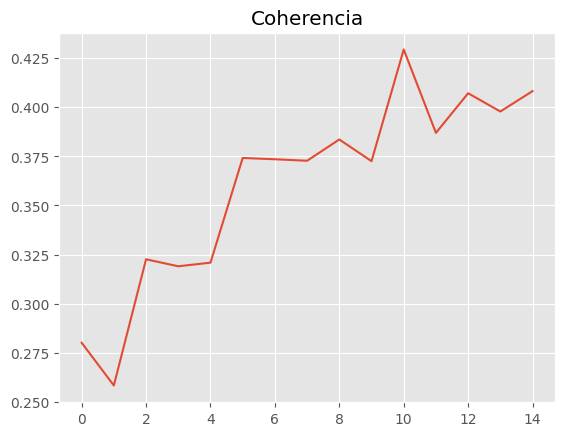

In [ ]:
#en esta pgrafica se ve que 6 topicos garantizan el mayor puntaje en coherencia
plt.plot(cohe)
plt.title('Coherencia')
plt.show()

In [ ]:
max(cohe)

0.43270683095374857

In [ ]:
lda_model=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=idword,num_topics=np.argmax(cohe),random_state=00,passes=40)

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.092*"tarjeta" + 0.087*"crédito" + 0.012*"dinero" + 0.010*"saber" + '
  '0.009*"mes" + 0.009*"deber" + 0.007*"banco" + 0.006*"débito" + '
  '0.005*"sacar" + 0.005*"pagar"'),
 (1,
  '0.032*"tarjeta" + 0.017*"crédito" + 0.015*"convertir" + 0.014*"credito" + '
  '0.013*"adulto" + 0.012*"facturar" + 0.007*"asi" + 0.006*"momento" + '
  '0.006*"básico" + 0.006*"fecha"'),
 (2,
  '0.089*"tarjeta" + 0.082*"crédito" + 0.034*"pagar" + 0.008*"comprar" + '
  '0.008*"día" + 0.007*"solo" + 0.007*"peso" + 0.006*"ver" + 0.006*"vez" + '
  '0.006*"cuota"'),
 (3,
  '0.053*"tarjeta" + 0.034*"crédito" + 0.015*"enero" + 0.012*"comprar" + '
  '0.008*"costar" + 0.008*"alguien" + 0.007*"credito" + 0.007*"méxico" + '
  '0.007*"canción" + 0.006*"..."'),
 (4,
  '0.053*"tarjeta" + 0.050*"crédito" + 0.016*"bolsonaro" + 0.015*"gasto" + '
  '0.010*"mujer" + 0.009*"vida" + 0.009*"elegir" + 0.009*"nunca" + '
  '0.009*"black" + 0.008*"hotel"'),
 (5,
  '0.035*"tarjeta" + 0.025*"crédito" + 0.015*"presidencial" + 0

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model,corpus,idword)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.223627 -0.004518       1        1  32.199241
0      0.192050  0.006781       2        1  24.323079
6      0.052250  0.163452       3        1   9.043410
8      0.048242 -0.094865       4        1   7.076822
5     -0.080905 -0.003916       5        1   5.892902
4     -0.034346 -0.200980       6        1   5.275394
7     -0.059205  0.036482       7        1   5.076911
3     -0.017267  0.055247       8        1   4.622771
1     -0.107615  0.007452       9        1   3.969237
9     -0.216829  0.034865      10        1   2.520233, topic_info=             Term         Freq        Total Category  logprob  loglift
9         tarjeta  4127.000000  4127.000000  Default  30.0000  30.0000
19          pagar   903.000000   903.000000  Default  29.0000  29.0000
2         crédito  3713.000000  3713.000000  Default  28.0000  28.0000
43         millón    86.000000    86.000000  Default  27.0000  27.0000
197       comprar   312.000000   312.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
684         mundo     8.421410    40.789159  Topic10  -5.1762   2.1032
450     noviembre     7.420628    29.557274  Topic10  -5.3027   2.2988
231   información     7.047651    47.693781  Topic10  -5.3543   1.7687
287       próximo     6.544216    19.134797  Topic10  -5.4284   2.6079
1434       cargar     6.563548    42.395477  Topic10  -5.4254   1.8153

[590 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
372       1  0.671694     ...
372       2  0.043806     ...
372       6  0.014602     ...
372       8  0.262837     ...
3044      3  0.965240  abonar
...     ...       ...     ...
444       1  0.508854       ‍
444       5  0.066372       ‍
444      10  0.398234       ‍
5076     10  0.920893       ⁦
8738     10  0.935269       ⁩

[915 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 7, 9, 6, 5, 8, 4, 2, 10])

In [ ]:
#comportamiento historico

In [ ]:
df1.dtypes

fecha             datetime64[ns, UTC-05:00]
text f1                              object
text_sentiment                       object
location                             object
dtype: object

In [ ]:
df1['fecha']=pd.to_datetime(df1['fecha'])

In [ ]:
df1.set_index('fecha',inplace=True)

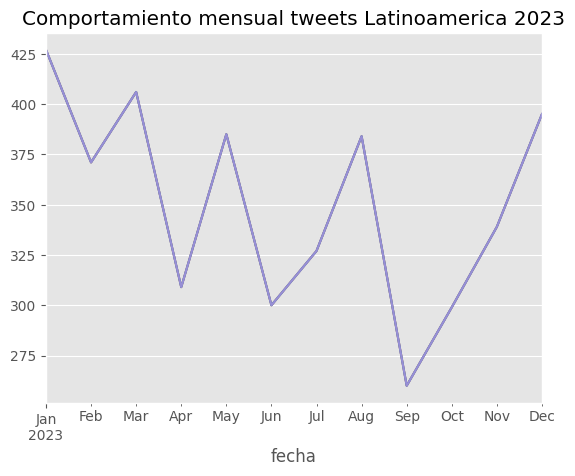

In [ ]:
fig,ax=plt.subplots()
df1.resample('M').count().plot(ax=ax)
plt.legend().set_visible(False)
ax.set_title('Comportamiento mensual tweets Latinoamerica 2023')
plt.show()

In [ ]:
#Se realizan filtros y un despliegue de la lista lematizada

df2=df1[df1['text f1'].str.contains('crédito|credito')]
df2=df2.explode('text lem')


In [ ]:
df2=df2[df2['text lem'].str.len()>3]

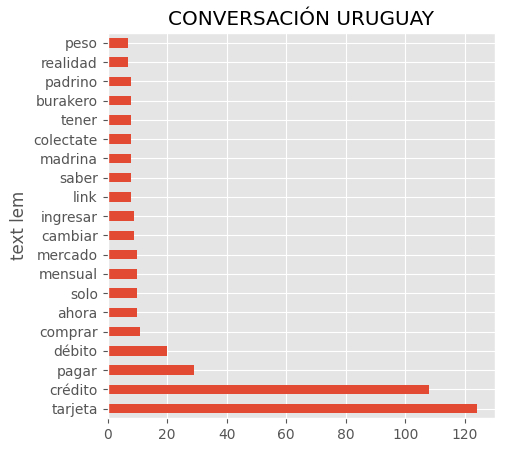

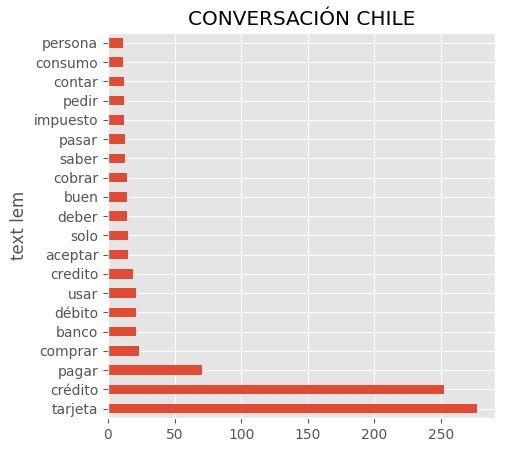

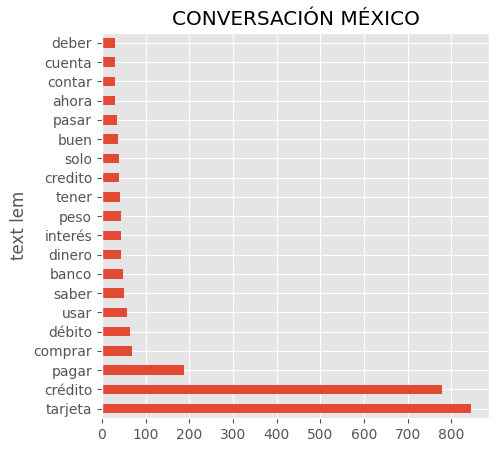

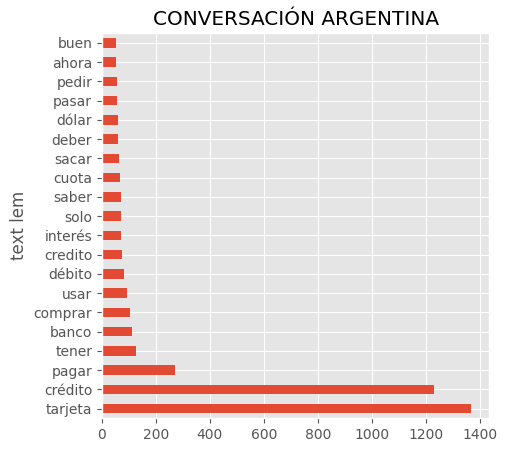

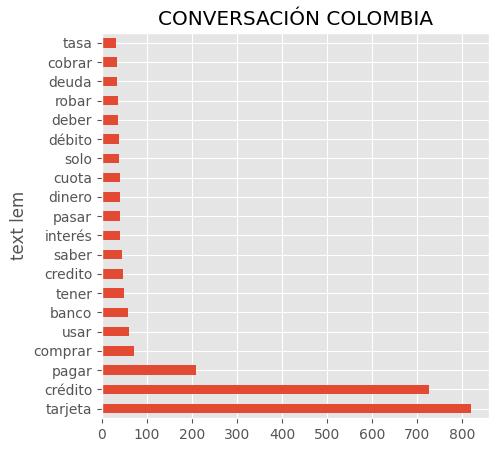

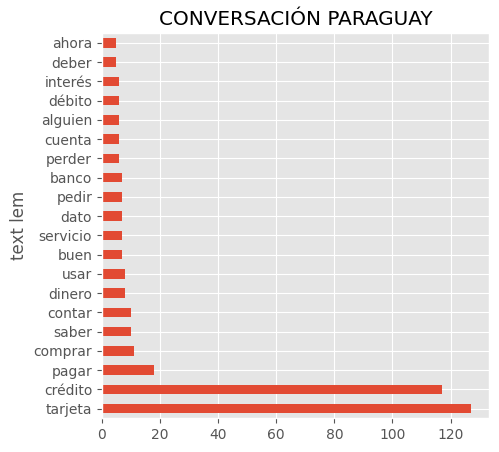

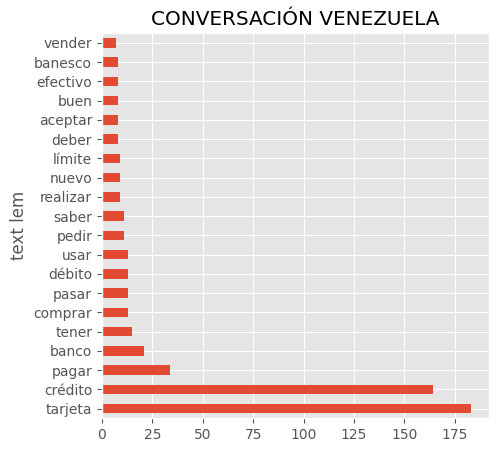

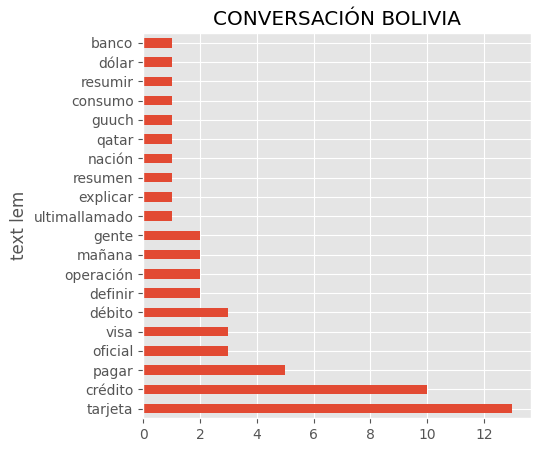

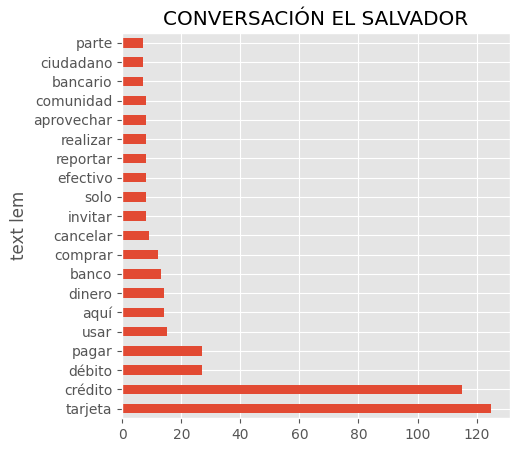

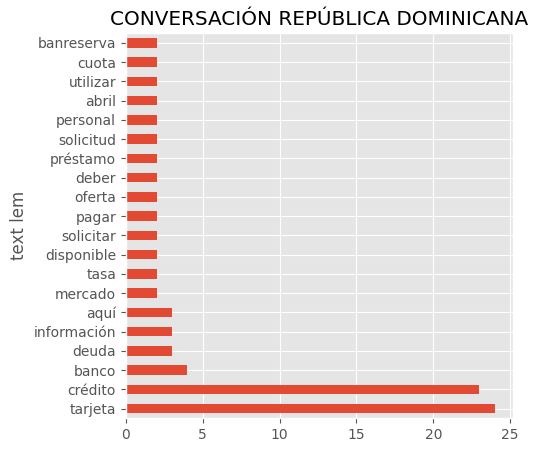

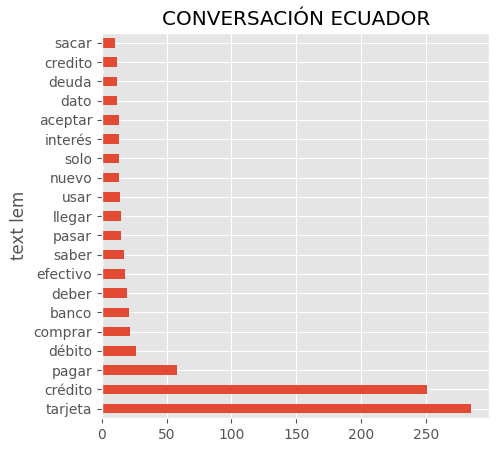

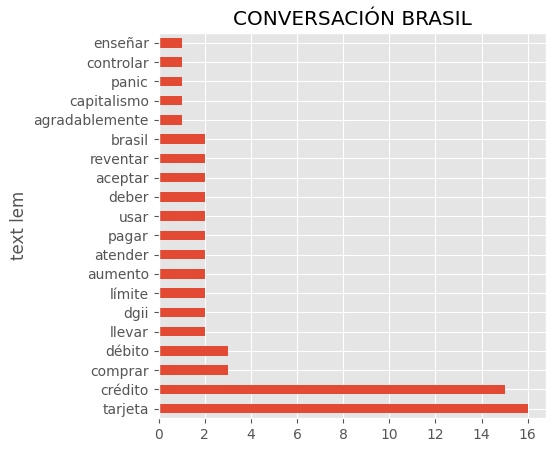

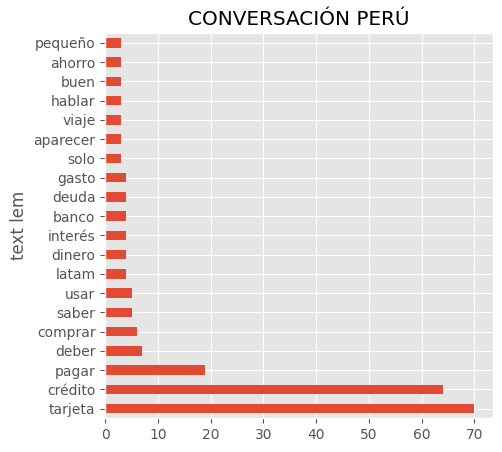

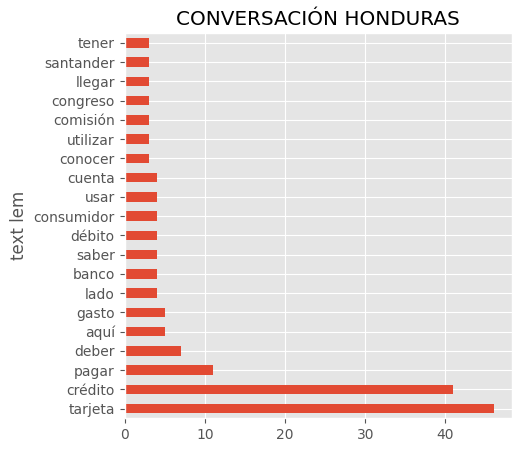

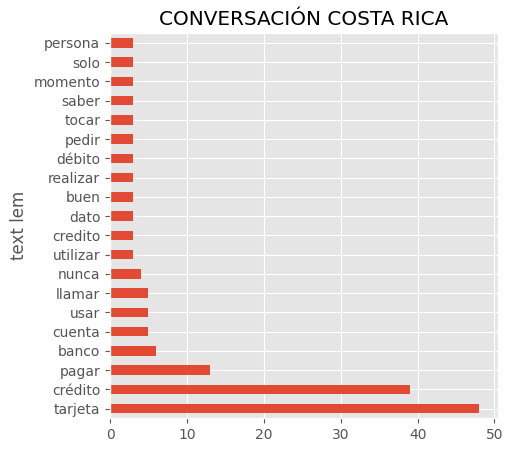

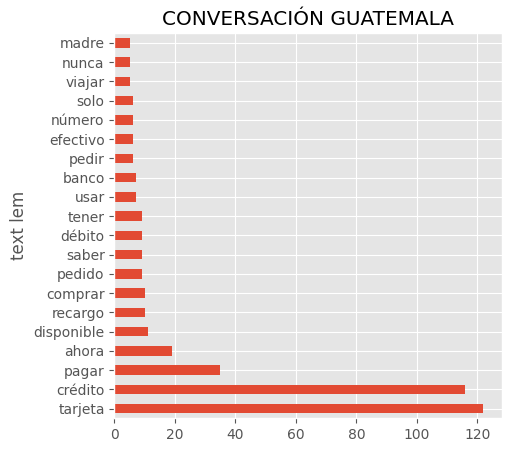

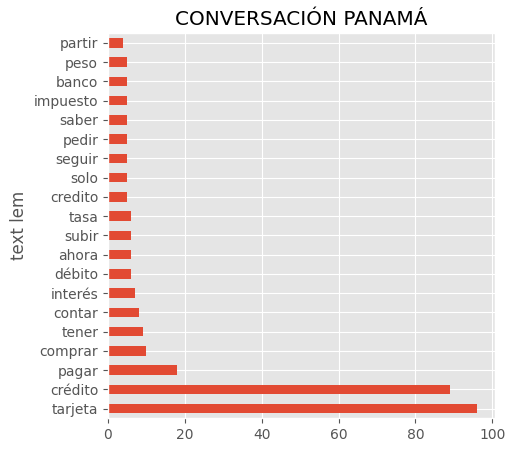

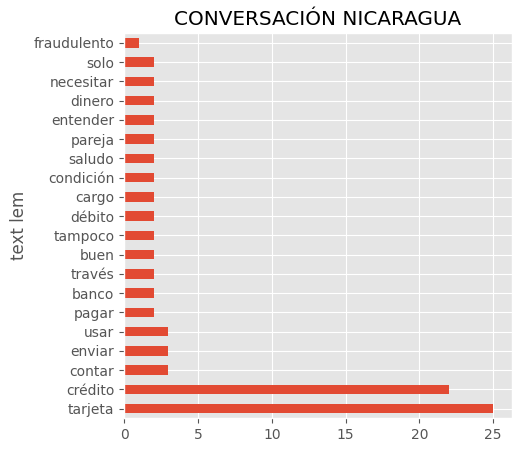

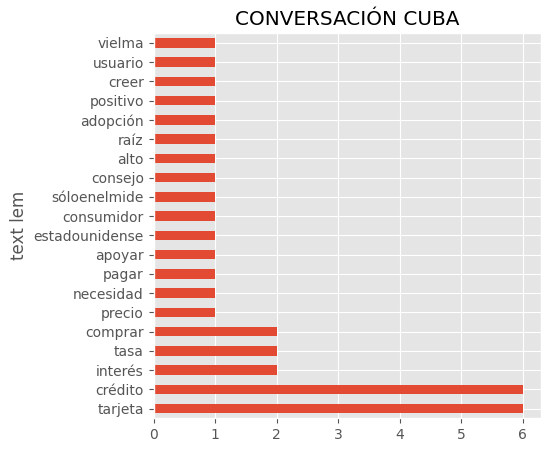

In [ ]:
for i in df2['location'].unique():
  fig,ax=plt.subplots(figsize=(5,5))
  CP=df2[df2['location']==i]
  CP=CP['text lem'].value_counts().head(20)
  CP.plot(kind='barh',ax=ax)
  #ax.invert_yaxis()
  ax.set_title(f'CONVERSACIÓN {i}')

In [ ]:
#dataframe que se emplara para el análsis de emociones
df3=df1

In [ ]:
#se asginan las columnas de interes
df3=df3[['location','text f1']]

In [ ]:
#se trae un modelo preentrenado de análisis de emociones de hugingface
pipeline_sentiment=pipeline("text-classification",model="SamLowe/roberta-base-go_emotions")

In [ ]:
def sentiment(x):
  return pd.Series(pipeline_sentiment(x['text f1'],top_k=2)[1]['label'])

In [ ]:
df3['sentiment']=df3.apply(sentiment,axis=1)

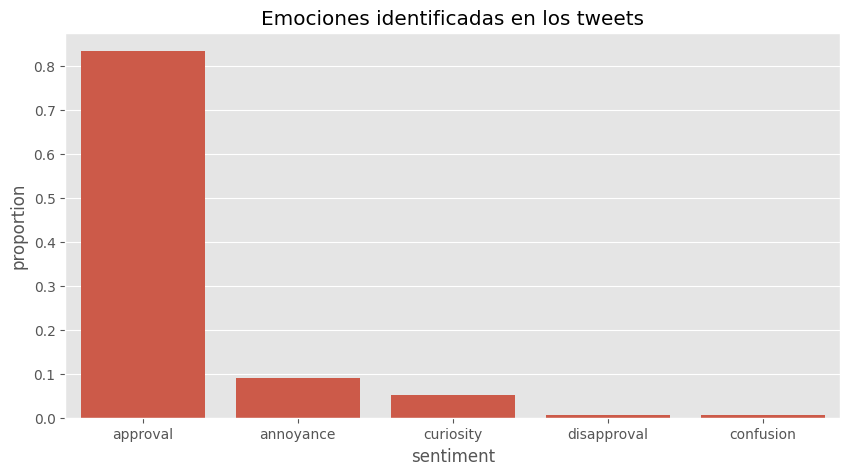

In [ ]:
#emociones identificadas en general en los tweets
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x=df3['sentiment'].value_counts().sort_values(ascending=False).head(5).index,y=df3['sentiment'].value_counts(True).sort_values(ascending=False).head(5))
ax.set_title('Emociones identificadas en los tweets');

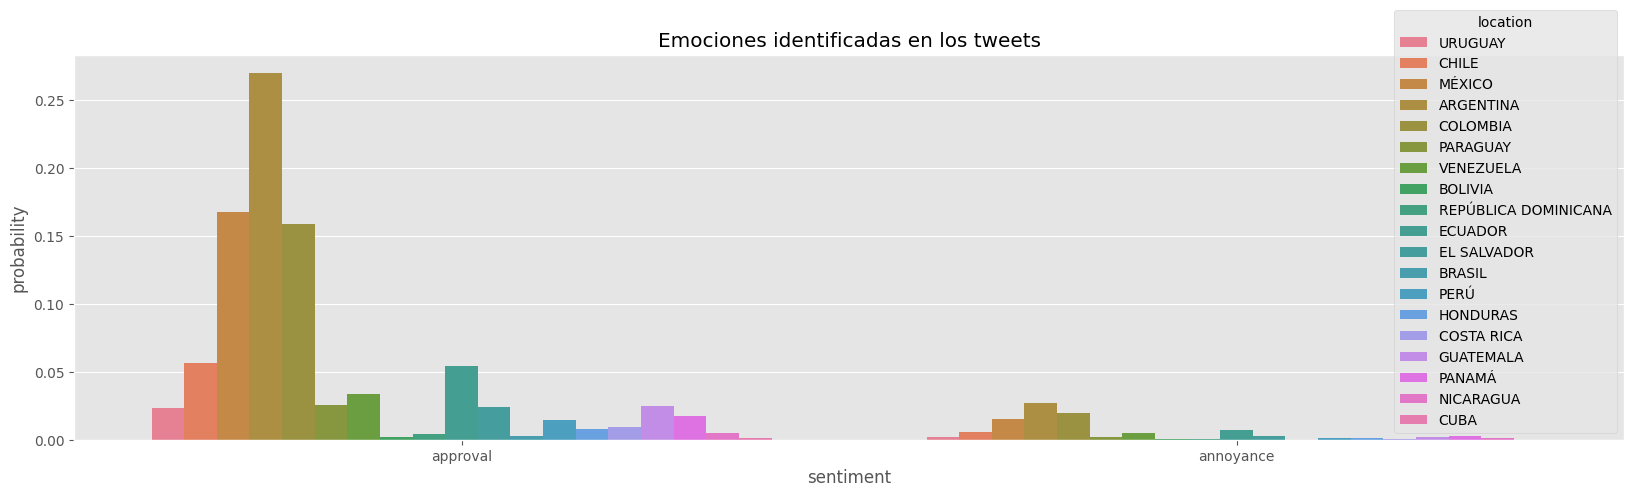

In [ ]:
#emociones identificadas en por paises
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(data=df3[df3['sentiment'].isin(['approval','annoyance'])],x='sentiment',hue='location',stat='probability')
ax.set_title('Emociones identificadas en los tweets');